In [11]:
import statistics as st
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sk

In [27]:


df0=pd.read_excel('C:\\Users\\iande\\Documentos\\proyectos\\ML with lumi data\\osl_parnaiba_table.xlsx',sheet_name="by_aliquot")
df0=df0.drop(columns=['Unnamed: 0'])
df0=df0.fillna(33.333)
#df0.head()
units=np.unique(df0.Unit)

means=df0.groupby('Unit').mean()
display(means)

,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
Unit,,,,,,,,
Cabecas,18.361874,40.724891,18.640409,40.634700,23.639671,47.503078,97.760000,333.030000
Longa,7.017094,27.913896,21.601094,50.484955,60.660936,36.261062,100.600000,334.250000
Motuca,13.790561,37.025867,18.242895,44.731238,41.123021,42.015616,98.810000,327.960000
Piaui,11.686221,33.970254,19.713013,46.316733,47.372373,37.036579,95.100000,328.400000
Pimenteiras,6.112638,20.149125,19.822393,60.028482,63.499790,29.601260,97.900000,333.700000
Poti,8.158198,25.201305,19.435752,55.362943,61.107623,45.464862,96.328571,332.646429
Sambaiba,23.462491,56.479509,15.782932,27.737558,6.235706,65.846488,95.187500,323.718750
Serra Grande,9.180209,30.367466,19.021190,50.611344,45.853973,50.704552,95.507692,326.007692


In [3]:
stds=df0.groupby('Unit').std()
display(stds)

,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
Unit,,,,,,,,
Cabecas,15.621086,18.813122,5.948563,17.924856,35.996767,20.690367,6.689714,5.997381
Longa,5.114732,21.482714,9.579124,17.222070,45.734136,18.563287,7.433361,6.306527
Motuca,13.520087,15.930155,3.318244,14.950552,36.926996,16.137636,7.466832,5.111226
Piaui,7.175591,18.259819,3.195970,16.970907,49.631291,9.952424,2.662115,5.984552
Pimenteiras,3.696630,14.614523,3.870314,13.345438,39.889044,5.525720,3.649658,9.301244
Poti,6.283641,14.564790,5.219980,13.339125,50.123876,20.720976,2.194018,7.389131
Sambaiba,7.467762,9.844862,5.459989,10.471069,5.825191,6.882163,1.441270,9.030252
Serra Grande,5.035505,14.154703,6.386627,13.227436,43.209632,16.892810,1.957374,5.928854


In [4]:
sems=stds/(np.sqrt(df0.drop(columns=['Group','sample']).groupby(by='Unit').agg('count')))
display(sems)

,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
Unit,,,,,,,,
Cabecas,2.016673,2.428764,0.767956,2.314089,4.647163,2.671115,0.863638,0.774259
Longa,0.852455,3.684255,1.642806,2.953561,7.622356,3.093881,1.238894,1.051088
Motuca,3.023183,3.562091,0.741982,3.343045,8.257127,3.608485,1.669634,1.142905
Piaui,1.195932,3.043303,0.532662,2.828484,8.271882,1.658737,0.443686,0.997425
Pimenteiras,0.616105,2.435754,0.645052,2.224240,6.648174,0.920953,0.608276,1.550207
Poti,0.839687,1.946302,0.697549,1.782516,6.698085,2.768957,0.293188,0.987414
Sambaiba,1.320126,1.740342,0.965199,1.851041,1.029758,1.216606,0.254783,1.596338
Serra Grande,0.698299,1.962904,0.885666,1.834315,5.992098,2.342611,0.271439,0.822184


In [5]:
for i in units:
    desc_st_i=df0[df0['Unit']==i].describe()
    display(desc_st_i)

,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,18.361874,40.724891,18.640409,40.634700,23.639671,47.503078,97.760000,333.030000
std,15.621086,18.813122,5.948563,17.924856,35.996767,20.690367,6.689714,5.997381
min,3.419577,6.878010,7.005169,8.684021,0.032505,18.236992,89.000000,320.400000
25%,5.785649,24.212454,14.736117,31.304394,2.483817,29.606192,94.400000,329.400000
50%,14.517891,44.190172,18.957465,39.700588,5.561497,44.136912,96.200000,333.000000
75%,21.050630,54.650288,22.169190,52.467744,18.771368,69.285560,98.000000,336.600000
max,57.199194,74.075396,31.858343,73.922528,124.463276,77.962892,121.400000,349.200000


,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
count,36.000000,34.000000,34.000000,34.000000,36.000000,36.000000,36.000000,36.000000
mean,7.017094,27.595125,20.910981,51.493893,60.660936,36.261062,100.600000,334.250000
std,5.114732,21.482714,9.579124,17.222070,45.734136,18.563287,7.433361,6.306527
min,2.722563,3.303677,5.527868,15.091255,3.406110,14.322623,92.600000,318.600000
25%,3.397787,7.849319,16.920568,36.188621,15.351533,29.516117,96.200000,331.200000
50%,5.026875,23.047428,20.135882,54.782919,54.111863,29.984171,98.000000,334.800000
75%,6.987950,47.250224,21.882376,66.272138,91.189508,32.956354,101.600000,338.400000
max,18.181262,79.380877,55.693912,74.450047,171.901804,78.166124,121.400000,347.400000


,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,13.790561,37.025867,18.242895,44.731238,41.123021,42.015616,98.810000,327.960000
std,13.520087,15.930155,3.318244,14.950552,36.926996,16.137636,7.466832,5.111226
min,4.686887,22.129231,11.337484,15.482354,0.858701,26.741621,94.400000,316.800000
25%,5.841407,24.577544,15.799842,44.000088,7.871779,31.435916,94.400000,324.000000
50%,7.824857,32.651363,18.708205,49.093920,38.229262,32.475017,96.200000,327.600000
75%,10.134508,40.700629,19.925129,53.852102,57.016549,48.185458,98.000000,333.000000
max,43.775748,69.456908,24.669393,62.096717,109.307519,71.074072,119.600000,336.600000


,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,11.686221,33.970254,19.713013,46.316733,47.372373,37.036579,95.100000,328.400000
std,7.175591,18.259819,3.195970,16.970907,49.631291,9.952424,2.662115,5.984552
min,3.397196,8.354902,11.528501,25.043322,1.857087,19.579367,90.800000,320.400000
25%,4.035770,11.861798,17.717854,30.988742,6.661093,30.648879,92.600000,324.000000
50%,10.318589,32.330610,19.704147,45.249599,24.604853,36.685203,94.400000,327.600000
75%,18.775549,51.112654,21.743508,66.436863,91.327659,42.258731,96.200000,331.200000
max,23.839506,59.955294,25.888463,72.023615,203.486032,56.701963,103.400000,351.000000


,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,6.112638,20.149125,19.822393,60.028482,63.499790,29.601260,97.900000,333.700000
std,3.696630,14.614523,3.870314,13.345438,39.889044,5.525720,3.649658,9.301244
min,2.698715,2.600042,12.440960,36.335012,3.314867,18.799745,92.600000,322.200000
25%,3.606583,9.451428,17.376803,43.932112,29.234248,27.571539,94.400000,328.950000
50%,3.998424,13.525904,19.023931,66.681613,65.776969,29.878851,98.000000,331.200000
75%,9.598215,38.430099,20.766192,69.376368,92.857704,30.491008,99.800000,337.050000
max,14.245932,48.558634,32.573373,79.982633,176.325213,43.886663,107.000000,372.600000


,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,8.158198,25.201305,19.435752,55.362943,61.107623,45.464862,96.328571,332.646429
std,6.283641,14.564790,5.219980,13.339125,50.123876,20.720976,2.194018,7.389131
min,3.256144,6.271899,6.546108,24.990085,1.778298,20.425709,92.600000,313.200000
25%,4.022319,13.190310,16.630277,43.907675,11.468410,27.976070,94.400000,328.500000
50%,4.992051,20.648382,19.323105,57.419491,63.872090,32.788722,96.200000,332.100000
75%,12.222154,37.879272,22.511087,66.331953,83.737565,70.568844,98.000000,338.400000
max,41.415929,56.333405,35.304248,83.508618,207.618461,78.442537,103.400000,345.600000


,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000
mean,23.462491,56.479509,15.782932,27.737558,6.235706,65.846488,95.18750,323.718750
std,7.467762,9.844862,5.459989,10.471069,5.825191,6.882163,1.44127,9.030252
min,7.960544,32.410353,7.728446,12.265861,0.308447,49.182900,92.60000,307.800000
25%,17.877862,51.863538,12.918708,20.859491,2.511526,64.668773,94.40000,316.800000
50%,23.791832,56.717239,14.756429,26.341076,4.095595,67.069560,94.40000,323.100000
75%,29.703805,62.113354,16.303047,34.812127,8.041368,69.075542,96.20000,329.400000
max,34.381429,75.697121,31.242107,54.863994,22.171475,75.388264,98.00000,345.600000


,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,9.180209,30.367466,19.021190,50.611344,45.853973,50.704552,95.507692,326.007692
std,5.035505,14.154703,6.386627,13.227436,43.209632,16.892810,1.957374,5.928854
min,3.476482,5.954731,6.431652,25.574611,1.758246,15.975365,90.800000,313.200000
25%,4.608330,17.097674,15.160786,41.009749,11.096012,36.584039,94.400000,322.200000
50%,8.470398,31.761669,19.177987,53.413479,27.989427,56.594057,96.200000,325.800000
75%,11.934794,37.829838,22.187889,61.392149,82.587004,61.483983,96.200000,329.850000
max,27.202591,66.892699,33.330574,74.449419,132.488469,77.841037,99.800000,336.600000


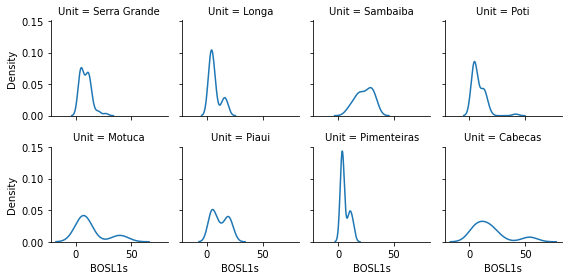

In [6]:
g = sns.FacetGrid(df0, col="Unit", col_wrap=4, height=2)
g.map(sns.kdeplot, "BOSL1s")

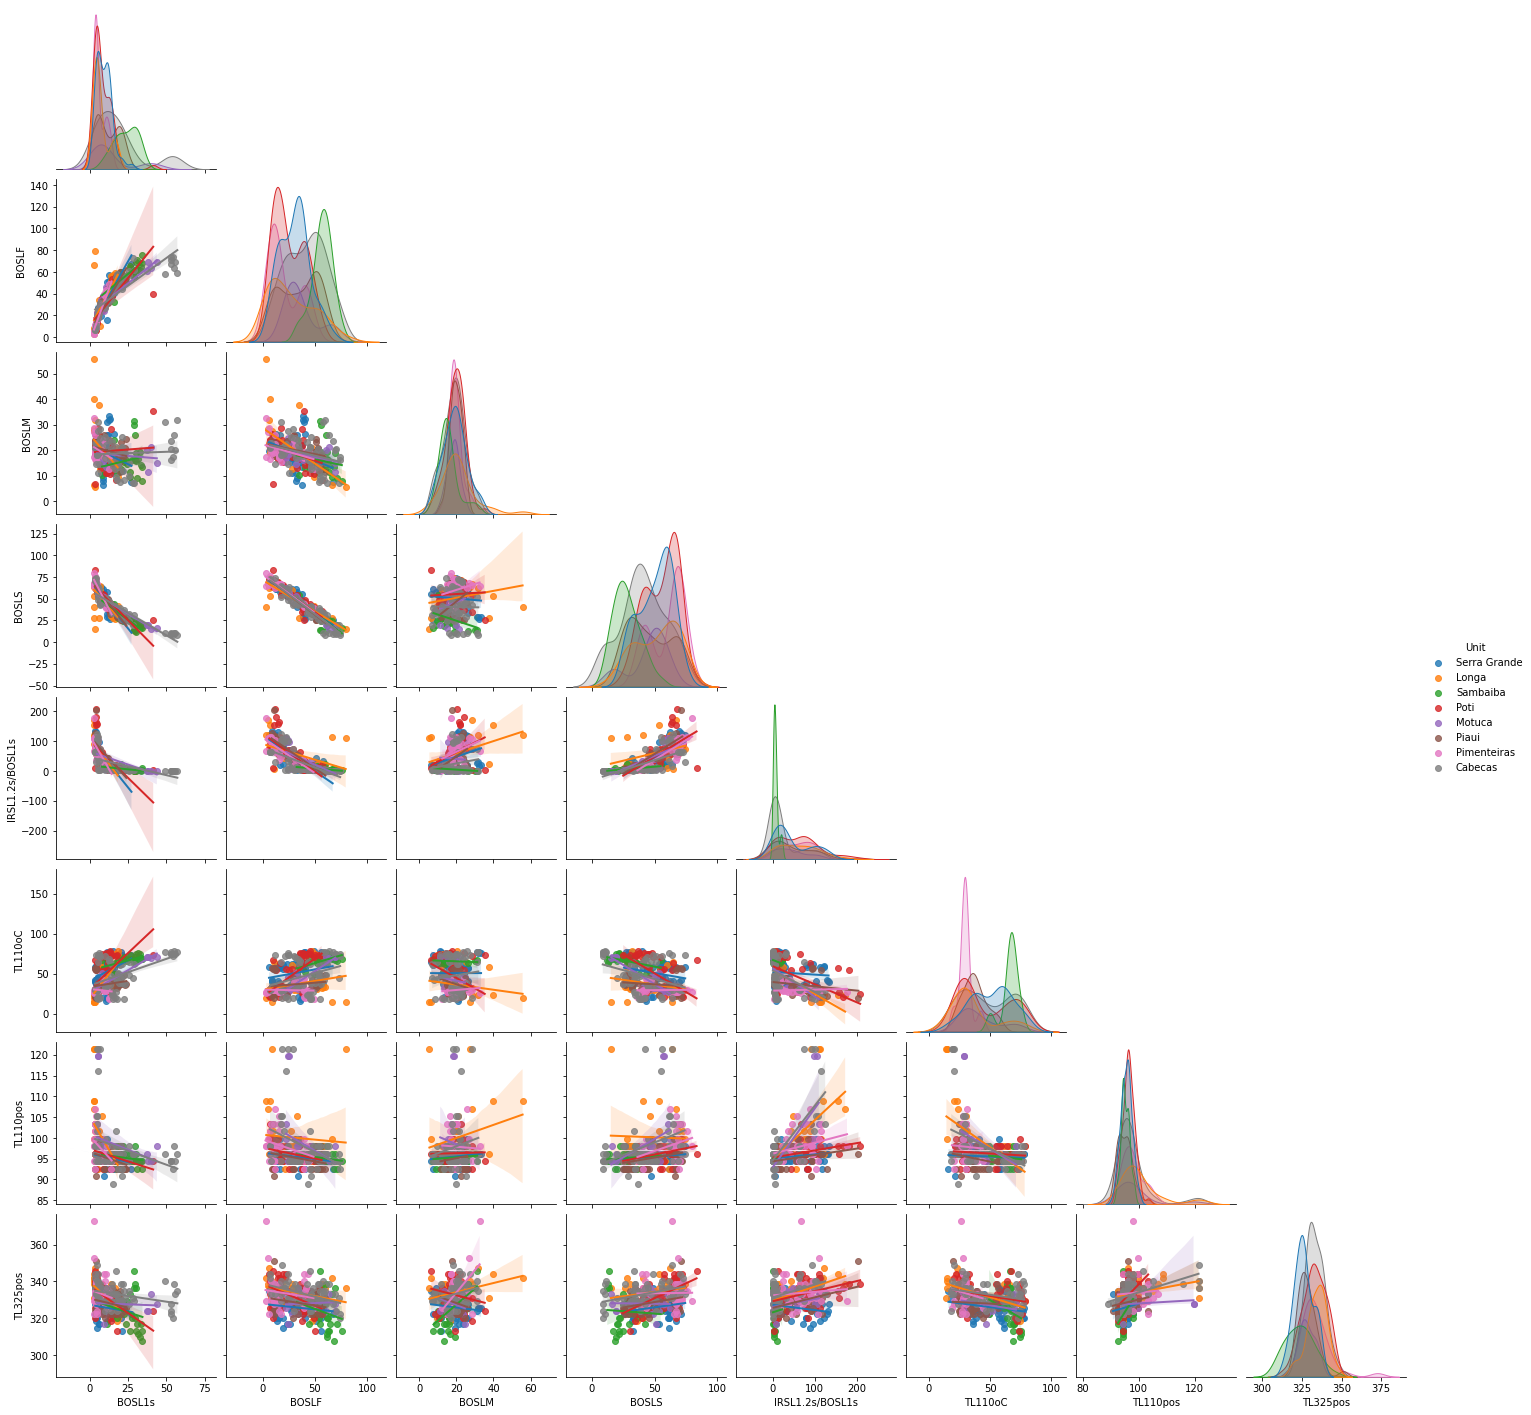

In [7]:
sns.pairplot(df0, hue='Unit',corner=True,kind='reg',plot_kws={'line_kws':{'lw':2}}) 
#p.fig.set_size_inches(13,9)
#plt.tight_layout()
#plt.savefig('Scatter_pairs.png')

<AxesSubplot:>

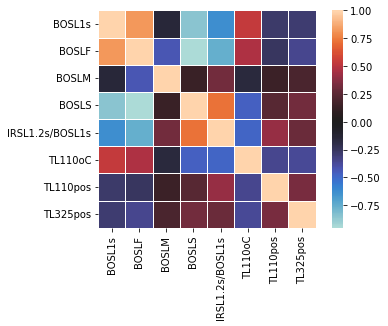

In [8]:
corr=df0.corr()
sns.heatmap(corr, center=0, square=True, linewidths=.5)

In [28]:
from sklearn.decomposition import PCA
df0=df0.drop(columns=['sample','Group','Unit'])
pca = PCA(n_components=8)
pca.fit(df0)

PCA(n_components=8)